In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import json

In [2]:
gp_df= gpd.read_file(open('Data/barris.geojson'))

gp_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_ANNEX    73 non-null     object  
 1   ANNEXDESCR  73 non-null     object  
 2   ID_TEMA     73 non-null     object  
 3   TEMA_DESCR  73 non-null     object  
 4   ID_CONJUNT  73 non-null     object  
 5   CONJ_DESCR  73 non-null     object  
 6   ID_SUBCONJ  73 non-null     object  
 7   SCONJ_DESC  73 non-null     object  
 8   ID_ELEMENT  73 non-null     object  
 9   ELEM_DESCR  73 non-null     object  
 10  NIVELL      73 non-null     object  
 11  NDESCR_CA   73 non-null     object  
 12  NDESCR_ES   73 non-null     object  
 13  NDESCR_EN   73 non-null     object  
 14  TERME       73 non-null     object  
 15  DISTRICTE   73 non-null     object  
 16  BARRI       73 non-null     object  
 17  AEB         73 non-null     object  
 18  SEC_CENS    73 non-null     object  
 19  GR

In [3]:
gp_df.shape

(73, 47)

In [271]:
gp_df2 = gp_df[['NOM','AREA','geometry']]
gp_df2

,NOM,AREA,geometry
0,el Raval,1100286.137,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
1,el Barri GÃ²tic,815593.938,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
2,la Barceloneta,1179381.956,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
3,"Sant Pere, Santa Caterina i la Ribera",1109668.777,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
4,el Fort Pienc,929355.787,"POLYGON ((2.18353 41.39227, 2.18238 41.39142, ..."
...,...,...,...
68,Ciutat Meridiana,376683.246,"POLYGON ((2.17959 41.46406, 2.17998 41.46357, ..."
69,Vallbona,613836.830,"POLYGON ((2.18407 41.46830, 2.18417 41.46828, ..."
70,la Trinitat Vella,809978.340,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
71,BarÃ³ de Viver,229892.748,"POLYGON ((2.19664 41.44257, 2.19560 41.44249, ..."


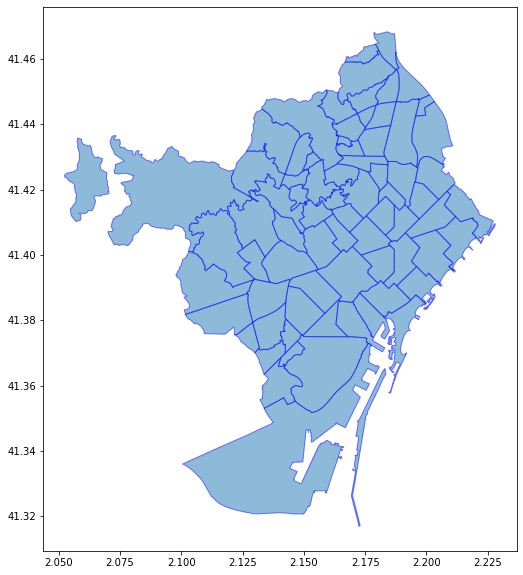

In [272]:
ax = gp_df2.plot(figsize=(10, 10), alpha=0.5, edgecolor='b')

In [273]:
cs_df = pd.read_csv('Data/listings_24.csv') 
cs_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,29,61
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,110,1,4,2016-06-20,0.07,29,148
2,19157,"Great Place in Sagrada Familia, Bcn",73099,Urania,Eixample,la Sagrada Família,41.407929,2.174540,Private room,30,2,160,2018-05-18,1.68,2,69
3,20345,"2 Double rooms for 4 persons, WI-FI",76809,Mila,Nou Barris,Vilapicina i la Torre Llobeta,41.429497,2.181558,Private room,25,2,71,2018-05-03,0.73,1,335
4,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380768,2.175510,Private room,60,3,2,2017-11-06,0.15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17216,25867202,Private luxury Suite and lounge with big terrace,193087775,Guillermo,Eixample,Sant Antoni,41.384010,2.162996,Private room,120,2,0,NaN,NaN,2,329
17217,25868244,Apartment close to the beach and shopping,29670225,Victoria,Sant Martí,el Besòs i el Maresme,41.413991,2.219469,Private room,100,2,0,NaN,NaN,1,352
17218,25870653,DOUBLE COSY BEDROOM (Gothic - Pl. Catalunya),187449906,Andrea,Ciutat Vella,el Barri Gòtic,41.386462,2.173674,Private room,40,3,0,NaN,NaN,2,170
17219,25871554,BIG COSY BEDROOM 3P - GOTHIC / PL CATALUNYA,187449906,Andrea,Ciutat Vella,el Barri Gòtic,41.386041,2.173715,Private room,70,3,0,NaN,NaN,2,170


In [274]:
gdf3 = gpd.GeoDataFrame(
    cs_df, geometry=gpd.points_from_xy(cs_df.longitude, cs_df.latitude))
gdf3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,29,61,POINT (2.18555 41.40889)
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,110,1,4,2016-06-20,0.07,29,148,POINT (2.17306 41.40420)
2,19157,"Great Place in Sagrada Familia, Bcn",73099,Urania,Eixample,la Sagrada Família,41.407929,2.174540,Private room,30,2,160,2018-05-18,1.68,2,69,POINT (2.17454 41.40793)
3,20345,"2 Double rooms for 4 persons, WI-FI",76809,Mila,Nou Barris,Vilapicina i la Torre Llobeta,41.429497,2.181558,Private room,25,2,71,2018-05-03,0.73,1,335,POINT (2.18156 41.42950)
4,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380768,2.175510,Private room,60,3,2,2017-11-06,0.15,2,0,POINT (2.17551 41.38077)


### Task 4.

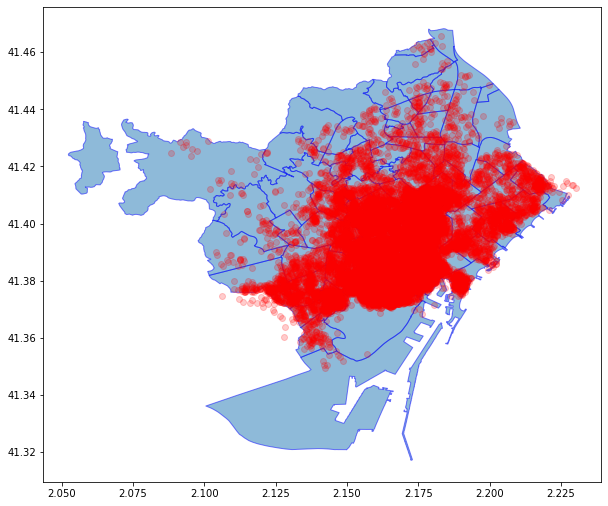

In [275]:
ax2 = gp_df2.plot(figsize=(10, 10), alpha=0.5, edgecolor='b')
gdf3.plot(ax=ax2, alpha=0.2,color='red');

### Task 5.

In [276]:
distr_gpd = gpd.read_file(open('Data/districts.geojson'))
distr_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_ANNEX    10 non-null     object  
 1   ANNEXDESCR  10 non-null     object  
 2   ID_TEMA     10 non-null     object  
 3   TEMA_DESCR  10 non-null     object  
 4   ID_CONJUNT  10 non-null     object  
 5   CONJ_DESCR  10 non-null     object  
 6   ID_SUBCONJ  10 non-null     object  
 7   SCONJ_DESC  10 non-null     object  
 8   ID_ELEMENT  10 non-null     object  
 9   ELEM_DESCR  10 non-null     object  
 10  NIVELL      10 non-null     object  
 11  NDESCR_CA   10 non-null     object  
 12  NDESCR_ES   10 non-null     object  
 13  NDESCR_EN   10 non-null     object  
 14  TERME       10 non-null     object  
 15  DISTRICTE   10 non-null     object  
 16  BARRI       10 non-null     object  
 17  AEB         10 non-null     object  
 18  SEC_CENS    10 non-null     object  
 19  GRA

In [277]:
distr_nom = pd.DataFrame(distr_gpd.groupby('NOM'))
distr_nom

,0,1
0,Ciutat Vella,ID_ANNEX ANNEXDESCR ID_TEMA TE...
1,Eixample,ID_ANNEX ANNEXDESCR ID_TEMA TE...
2,GrÃ cia,ID_ANNEX ANNEXDESCR ID_TEMA TE...
3,Horta-GuinardÃ³,ID_ANNEX ANNEXDESCR ID_TEMA TE...
4,Les Corts,ID_ANNEX ANNEXDESCR ID_TEMA TE...
5,Nou Barris,ID_ANNEX ANNEXDESCR ID_TEMA TE...
6,Sant Andreu,ID_ANNEX ANNEXDESCR ID_TEMA TE...
7,Sant MartÃ­,ID_ANNEX ANNEXDESCR ID_TEMA TE...
8,Sants-MontjuÃ¯c,ID_ANNEX ANNEXDESCR ID_TEMA TE...
9,SarriÃ -Sant Gervasi,ID_ANNEX ANNEXDESCR ID_TEMA TE...


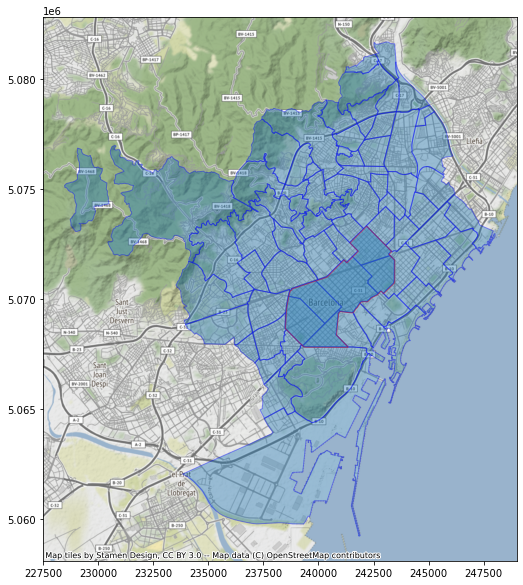

In [278]:
gp_df2 = gp_df.to_crs(epsg=3857)
distr_gpd2 = distr_gpd[distr_gpd["NOM"]=='Eixample']
distr_gpd2 = distr_gpd2.to_crs(epsg=3857)

ax2 = gp_df2.plot(figsize=(10,10), alpha=0.4, edgecolor='b');
ctx.add_basemap(ax2)

distr_gpd2.plot(ax=ax2, figsize=(10,10), alpha=0.4, edgecolor='r');

### Task 6

In [312]:
'AREA' in  gp_df

True

#### Listings 24

In [ ]:
df_l24 = pd.read_csv('Data/listings_24.csv')
df_l30 = pd.read_csv('Data/listings_30.csv')
df_l33 = pd.read_csv('Data/listings_33.csv')
df_l45 = pd.read_csv('Data/listings_45.csv')


In [313]:
'AREA' in df_l24

False

In [ ]:
#Area
area = gp_df2[['NOM', 'AREA']].sort_values(by='NOM').reset_index()

#The total number of listings for each of Listings 24's neighborhood.

nw_l24 = l24[l24['room_type']=="Entire home/apt"]

nl24 = nw_l24.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(column="neighbourhood", aggfunc="count")).reset_index()
gl24 = l24.dropna()

In [ ]:
#The “density” of each neighborhood of Listings 24's neighborhoods.

d_l24 = nl24['count_col']/area['AREA']
d_l24.dropna()

In [ ]:
#The median price of each neighborhood of Listings 24's neighborhoods.

med_l24 = nw_l24.groupby(["neighbourhood"]).median().reset_index()

m_l24 = pd.DataFrame(med_l24[["neighbourhood","price"]])
m_l24 = m_l24.rename(columns={'price' : 'price_24'})

m_l24.dropna()

### Listings 30

In [ ]:
#The total number of listings for each of Listings 30's neighborhood.

nw_l30 = l30[l30['room_type']=="Entire home/apt"]

nl30 = nw_l30.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(column="neighbourhood", aggfunc="count")).reset_index()
nl30.dropna()

In [ ]:
#The “density” of each neighborhood of Listings 30's neighborhoods.

d_l30 = xl30['count_col']/area['AREA']
d_l30.dropna()

In [ ]:
#The median price of each neighborhood of Listings 30's neighborhoods.

med_l30 = nw_l30.groupby(["neighbourhood"]).median().reset_index()

m_l30 = pd.DataFrame(med_l30[["neighbourhood","price"]])
m_l30 = m_l30.rename(columns={'price' : 'price_30'})

m_l30.dropna()

### Listings 33

In [280]:
#The total number of listings for each of Listings 33's neighborhood.

nw_l33 = l33[l33['room_type']=="Entire home/apt"]

nl33 = nw_l33.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(column="neighbourhood", aggfunc="count")).reset_index()
nl33.dropna()

,neighbourhood,count_col
0,Baró de Viver,1
1,Can Baró,19
2,Canyelles,2
3,Diagonal Mar i el Front Marítim del Poblenou,109
4,Horta,6
...,...,...
62,la Vila Olímpica del Poblenou,114
63,la Vila de Gràcia,543
64,les Corts,113
65,les Roquetes,8


In [281]:
#The “density” of each neighborhood of Listings 33's neighborhoods.

d_l33 = nl33['count_col']/area['AREA']
d_l33.dropna()

0     0.000004
1     0.000049
2     0.000017
3     0.000138
4     0.000016
        ...   
62    0.000176
63    0.001609
64    0.000196
65    0.000010
66    0.000020
Length: 67, dtype: float64

In [282]:
#The median price of each neighborhood of Listings 33's neighborhoods.

med_l33 = nw_l33.groupby(["neighbourhood"]).median().reset_index()

m_l33 = pd.DataFrame(med_l33[["neighbourhood","price"]])
m_l33 = m_l33.rename(columns={'price' : 'price_33'})

m_l33.dropna()

,neighbourhood,price_33
0,Baró de Viver,25.0
1,Can Baró,85.0
2,Canyelles,74.5
3,Diagonal Mar i el Front Marítim del Poblenou,217.0
4,Horta,54.0
...,...,...
62,la Vila Olímpica del Poblenou,180.0
63,la Vila de Gràcia,99.0
64,les Corts,85.0
65,les Roquetes,47.5


### Listings 45

In [283]:
#The median price of each neighborhood of Listings 45's neighborhoods.

nw_l45 = l45[l45['room_type']=="Entire home/apt"]

nl45 = nw_l45.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(column="neighbourhood", aggfunc="count")).reset_index()
nl45.dropna()

,neighbourhood,count_col
0,Baró de Viver,1
1,Can Baró,19
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,129
4,Horta,6
...,...,...
63,la Vila Olímpica del Poblenou,115
64,la Vila de Gràcia,606
65,les Corts,106
66,les Roquetes,10


In [284]:
#The “density” of each neighborhood of Listings 45's neighborhoods.

d_l45 = xl30['count_col']/area['AREA']
d_l45.dropna()

0     0.000004
1     0.000055
2     0.000008
3     0.000156
4     0.000011
        ...   
64    0.000205
65    0.000670
66    0.000133
67    0.000006
68    0.000019
Length: 69, dtype: float64

In [285]:
#The median price of each neighborhood of Listings 45's neighborhoods.

med_l45 = nw_l45.groupby(["neighbourhood"]).median().reset_index()

m_l45 = pd.DataFrame(med_l45[["neighbourhood","price"]])
m_l45 = m_l45.rename(columns={'price' : 'price_45'})

m_l45.dropna()

,neighbourhood,price_45
0,Baró de Viver,25.0
1,Can Baró,80.0
2,Canyelles,86.0
3,Diagonal Mar i el Front Marítim del Poblenou,150.0
4,Horta,43.0
...,...,...
63,la Vila Olímpica del Poblenou,190.0
64,la Vila de Gràcia,100.0
65,les Corts,100.0
66,les Roquetes,47.5


### Task 7

In [286]:
gp_df2 = gp_df.copy()

gp_df2["density_24"] = d_l24
gp_df2["density_30"] = d_l30
gp_df2["density_33"] = d_l33
gp_df2["density_45"] = d_l45

### ---> Listing 24

In [287]:
nw_df24 = df_l24[df_l24['room_type']=="Entire home/apt"]

In [357]:
nw_df24.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,29,61
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,110,1,4,2016-06-20,0.07,29,148
8,31823,"Aribau, Friendly Rentals",136853,Fidelio,Eixample,l'Antiga Esquerra de l'Eixample,41.387306,2.159072,Entire home/apt,75,3,50,2018-05-15,0.53,42,305
9,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.409498,2.159376,Entire home/apt,75,3,138,2018-05-01,1.55,42,288
10,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.409282,2.161118,Entire home/apt,95,3,62,2018-05-22,0.69,42,304


In [289]:
list24 = nw_df24.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(
    column="neighbourhood", aggfunc="count")).reset_index()
list24

,neighbourhood,count_col
0,Baró de Viver,1
1,Can Baró,15
2,Canyelles,2
3,Diagonal Mar i el Front Marítim del Poblenou,121
4,Horta,8
...,...,...
63,la Vila Olímpica del Poblenou,112
64,la Vila de Gràcia,497
65,les Corts,84
66,les Roquetes,2


In [290]:
#Density of listing 24
den24 = list24['count_col']/area['AREA']
den24.dropna()

0     0.000004
1     0.000039
2     0.000017
3     0.000153
4     0.000021
        ...   
63    0.000332
64    0.000862
65    0.000104
66    0.000003
67    0.000015
Length: 68, dtype: float64

In [291]:
#Median of listing 24
med24 = nw_df24.groupby(["neighbourhood"]).median().reset_index()

med24 = pd.DataFrame(med24[["neighbourhood","price"]])
med24 = med24.rename(columns={'price' : 'price_24'})

med24.dropna()

,neighbourhood,price_24
0,Baró de Viver,25.0
1,Can Baró,80.0
2,Canyelles,89.0
3,Diagonal Mar i el Front Marítim del Poblenou,229.0
4,Horta,100.0
...,...,...
63,la Vila Olímpica del Poblenou,180.0
64,la Vila de Gràcia,100.0
65,les Corts,100.0
66,les Roquetes,98.5


### ---> Listing 30

In [356]:
nw_df30 = df30[df30['room_type']=="Entire home/apt"]
df_l30.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,34,20
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,55,1,5,2018-06-18,0.07,34,40
2,21605,Nice and sunny duble room,82522,Meritxell,Sant Martí,el Poblenou,41.405604,2.198205,Private room,33,2,103,2018-11-30,3.26,3,290
3,31377,"Room for 2, Sagrada Famili",134698,Svetlana,Horta-Guinardó,el Baix Guinardó,41.410969,2.170701,Private room,42,3,4,2018-03-12,0.09,3,194
4,31380,"Room for 2-3. Barcelona, Sagrada Famili",134698,Svetlana,Horta-Guinardó,el Baix Guinardó,41.410900,2.170819,Private room,53,3,38,2018-04-04,0.90,3,217


In [293]:
list30 = nw_df30.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(
    column="neighbourhood", aggfunc="count")).reset_index()
list30

,neighbourhood,count_col
0,Baró de Viver,1
1,Can Baró,21
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,123
4,Horta,4
...,...,...
64,la Vila Olímpica del Poblenou,118
65,la Vila de Gràcia,543
66,les Corts,99
67,les Roquetes,7


In [294]:
#Density of listing 30
den30 = list30['count_col']/area['AREA']
den30.dropna()

0     0.000004
1     0.000055
2     0.000008
3     0.000156
4     0.000011
        ...   
64    0.000205
65    0.000670
66    0.000133
67    0.000006
68    0.000019
Length: 69, dtype: float64

In [295]:
#Median of listing 30
med30 = nw_df30.groupby(["neighbourhood"]).median().reset_index()

med30 = pd.DataFrame(med30[["neighbourhood","price"]])
med30 = med30.rename(columns={'price' : 'price_30'})

med30.dropna()

,neighbourhood,price_30
0,Baró de Viver,25.0
1,Can Baró,75.0
2,Canyelles,80.0
3,Diagonal Mar i el Front Marítim del Poblenou,150.0
4,Horta,75.0
...,...,...
64,la Vila Olímpica del Poblenou,150.0
65,la Vila de Gràcia,90.0
66,les Corts,75.0
67,les Roquetes,50.0


### ---> Listing 33

In [355]:
nw_df33 = df_l33[df_l33['room_type']=="Entire home/apt"]
nw_df33.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,29,58
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,6,2019-02-04,0.09,29,285
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain,Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,200,3,35,2019-01-01,0.36,2,310
6,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,62,1,154,2019-02-12,1.57,42,208
7,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,72,1,68,2019-01-17,0.68,42,210


In [297]:
list33 = nw_df33.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(
    column="neighbourhood", aggfunc="count")).reset_index()
list33

,neighbourhood,count_col
0,Baró de Viver,1
1,Can Baró,19
2,Canyelles,2
3,Diagonal Mar i el Front Marítim del Poblenou,109
4,Horta,6
...,...,...
62,la Vila Olímpica del Poblenou,114
63,la Vila de Gràcia,543
64,les Corts,113
65,les Roquetes,8


In [298]:
#Density of listing 33
den33 = list33['count_col']/area['AREA']
den33.dropna()

0     0.000004
1     0.000049
2     0.000017
3     0.000138
4     0.000016
        ...   
62    0.000176
63    0.001609
64    0.000196
65    0.000010
66    0.000020
Length: 67, dtype: float64

In [299]:
#Median of listing 33
med33 = nw_df33.groupby(["neighbourhood"]).median().reset_index()

med33 = pd.DataFrame(med33[["neighbourhood","price"]])
med33 = med33.rename(columns={'price' : 'price_33'})

med33.dropna()

,neighbourhood,price_33
0,Baró de Viver,25.0
1,Can Baró,85.0
2,Canyelles,74.5
3,Diagonal Mar i el Front Marítim del Poblenou,217.0
4,Horta,54.0
...,...,...
62,la Vila Olímpica del Poblenou,180.0
63,la Vila de Gràcia,99.0
64,les Corts,85.0
65,les Roquetes,47.5


### ---> Listing 45

In [354]:
nw_df45 = df_l45[df_l45['room_type']=="Entire home/apt"]
nw_df45

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412910,2.220630,Entire home/apt,220,3,52,2019-12-15,0.47,2,343
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.409500,2.159380,Entire home/apt,60,1,187,2020-01-07,1.69,30,278
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.409280,2.161120,Entire home/apt,65,1,93,2020-03-01,0.83,30,268
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,140,2,63,2020-02-22,0.60,13,290
6,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.176230,Entire home/apt,227,5,148,2020-02-28,1.29,2,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21104,42909526,Stylish 1BD in Eixample,32037490,SweetInn,Eixample,Sant Antoni,41.382123,2.160402,Entire home/apt,100,2,0,NaN,NaN,91,291
21108,42910007,Apt de tres habitaciones con dos baños - 62,1920353,Juan,Eixample,la Dreta de l'Eixample,41.397311,2.169296,Entire home/apt,140,20,0,NaN,NaN,3,46
21109,42910070,*monthly stays* nice apartment 3 rooms,1414702,Ferran,Sant Andreu,Sant Andreu,41.435378,2.189063,Entire home/apt,45,32,0,NaN,NaN,22,101
21112,42912468,Apartment near the City Center in Barcelona,157250994,Apartment Barcino,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.402424,2.137776,Entire home/apt,80,28,0,NaN,NaN,94,348


In [301]:
list45 = nw_df45.groupby(["neighbourhood"]).agg(count_col=pd.NamedAgg(
    column="neighbourhood", aggfunc="count")).reset_index()
list45

,neighbourhood,count_col
0,Baró de Viver,1
1,Can Baró,19
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,129
4,Horta,6
...,...,...
63,la Vila Olímpica del Poblenou,115
64,la Vila de Gràcia,606
65,les Corts,106
66,les Roquetes,10


In [302]:
#Density of listing 45
den45 = list45['count_col']/area['AREA']
den45.dropna()

0     0.000004
1     0.000049
2     0.000008
3     0.000163
4     0.000016
        ...   
63    0.000341
64    0.001051
65    0.000131
66    0.000013
67    0.000017
Length: 68, dtype: float64

In [303]:
#Median of listing 45
med45 = nw_df45.groupby(["neighbourhood"]).median().reset_index()

med45 = pd.DataFrame(med45[["neighbourhood","price"]])
med45 = med45.rename(columns={'price' : 'price_45'})

med45.dropna()

,neighbourhood,price_45
0,Baró de Viver,25.0
1,Can Baró,80.0
2,Canyelles,86.0
3,Diagonal Mar i el Front Marítim del Poblenou,150.0
4,Horta,43.0
...,...,...
63,la Vila Olímpica del Poblenou,190.0
64,la Vila de Gràcia,100.0
65,les Corts,100.0
66,les Roquetes,47.5


## Task 8.

In [329]:
#create a copy of the barris dataset
gp_df4 = gp_df.copy()

In [330]:
# Add the new density columns
gp_df4["density_24"] = den24
gp_df4["density_30"] = den30
gp_df4["density_33"] = den33
gp_df4["density_45"] = den45

#Listing 24 density
gp_df4 = gp_df4.merge(med24, how='left', left_on=gp_df4["NOM"], right_on= med24["neighbourhood"])
gp_df4.drop(columns=["key_0", "neighbourhood"], inplace=True)

#Listing 30 density
gp_df4 = gp_df4.merge(med30, how='left', left_on=gp_df4["NOM"], right_on= med30["neighbourhood"])
gp_df4.drop(columns=["key_0", "neighbourhood"], inplace=True)

#Listing 33 density
gp_df4 = gp_df4.merge(med33, how='left', left_on=gp_df4["NOM"], right_on= med33["neighbourhood"])

#Listing 45 density
#gp_df4 = gp_df4.merge(med45, how='left', left_on=gp_df4["NOM"], right_on= med45["neighbourhood"])
#gp_df4.drop(columns=["key_0", "neighbourhood"], inplace=True)

gp_df4.fillna(value={'density_24' : 0, 'density_30' : 0, 'density_33' : 0,'density_45' : 0,}, inplace=True)
gp_df4.fillna(value={'price_24' : 0, 'price_30' : 0, 'price_33' : 0,'price_45' : 0,}, inplace=True)

## Task 9.

In [353]:
 gp_df4.head()

,key_0,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,HEX_COLOR7,geometry,density_24,density_30,density_33,density_45,price_24,price_30,neighbourhood,price_33
0,el Raval,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,#73A88F,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...",0.000004,0.000004,0.000004,0.000004,105.5,68.5,el Raval,66.0
1,el Barri GÃ²tic,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,#73A88F,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...",0.000039,0.000055,0.000049,0.000049,0.0,0.0,NaN,0.0
2,la Barceloneta,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,#73A88F,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...",0.000017,0.000008,0.000017,0.000008,101.0,55.0,la Barceloneta,58.0
3,"Sant Pere, Santa Caterina i la Ribera",01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,#73A88F,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...",0.000153,0.000156,0.000138,0.000163,100.0,70.0,"Sant Pere, Santa Caterina i la Ribera",70.0
4,el Fort Pienc,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,#73A88F,"POLYGON ((2.18353 41.39227, 2.18238 41.39142, ...",0.000021,0.000011,0.000016,0.000016,125.0,105.0,el Fort Pienc,120.0


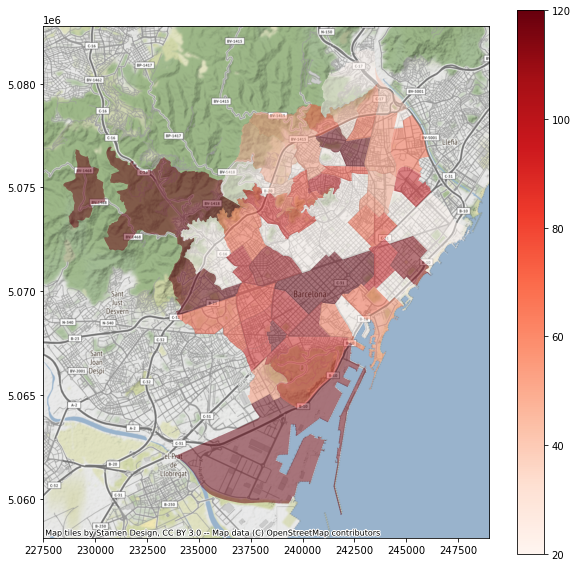

In [352]:
mapx = gp_df4.to_crs(epsg=3857)
ax3 = mapx.plot(figsize=(10, 10), alpha=0.5, column='price_33', cmap='Reds', vmin=20, vmax=120, legend = True);
ctx.add_basemap(ax3);

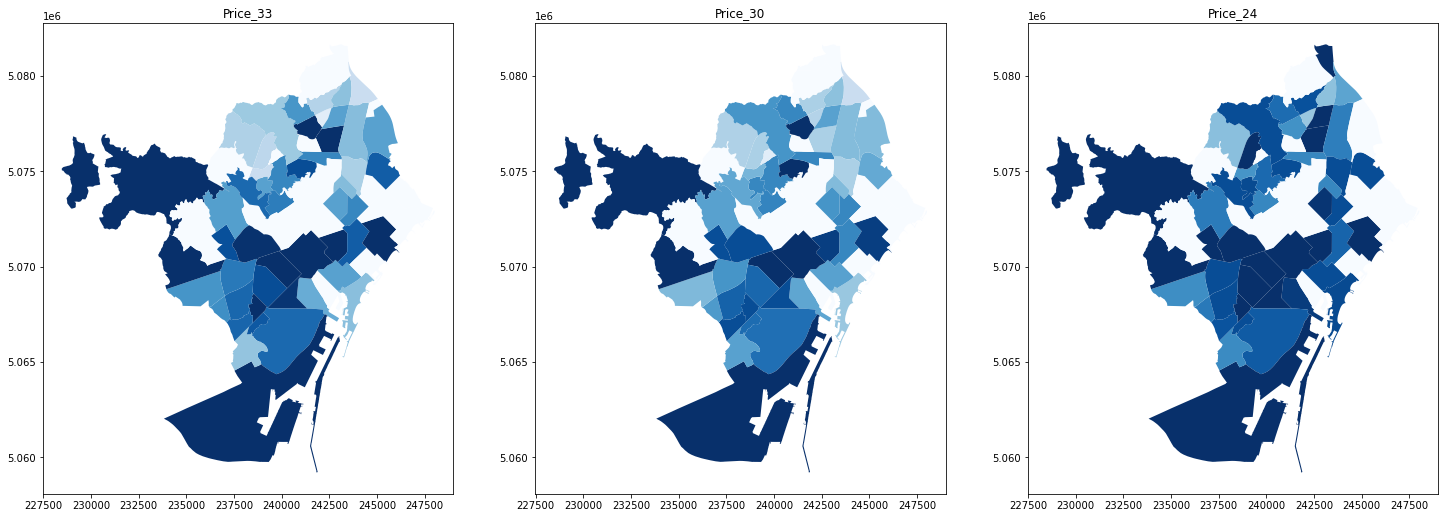

In [351]:
fig, axs = plt.subplots(1,3, figsize=(25, 20))


axs[0].set_title('Price_33')

mapx.plot(ax=axs[0], column='price_33', cmap='Blues', vmin=20, vmax=110);

axs[1].set_title('Price_30')

mapx.plot(ax=axs[1],column='price_30', cmap='Blues', vmin=20, vmax=110);

axs[2].set_title('Price_24')

mapx.plot(ax=axs[2],  column='price_24', cmap='Blues', vmin=20, vmax=110);

#axs[3].set_title('Price_45')

#mapx.plot(ax=axs[3], edgecolor='b', column='price_45', cmap='Blues', vmin=20, vmax=110)

